### Cleaning Description column with NLTK


Using the NLTK library, which is one of the oldest and most commonly used Python libraries for Natural Language Processing, I will remove stop words from the `description` column. 

"NLTK helps the computer to analysis, preprocess, and understand the written text through tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition."

"Stopwords are the English words which does not add much meaning to a sentence and they can safely be ignored without 
sacrificing the meaning of the sentence."

To remove stop words from a sentence, we are going to divide each `description` entry into words (tokenize) and then remove them if they belong to the list of stop words provided by NLTK.

In [140]:
# Import all NLTK libary and extra tools
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

# Create a copy of description column
df['desc_no_sw'] = df['description']

# Loop through each entry of the description column, create tokens
for text in df['desc_no_sw']:
    text_tokens = word_tokenize(text) 
    # Create a list for each entry and remove stopwords
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    # Rejoin all list elements to a string
    no_sw = ' '.join(tokens_without_sw)
    # Replace the lists with strings just created 
    df['desc_no_sw'] = df['desc_no_sw'].apply(lambda x: x.replace(text, no_sw))
    
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-140-cc3b458cf19c>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()


,property,url,price,rooms,surface,bathrooms,floor,description,original_price,price_reduction,area,room_is_missing,bathroom_is_missing,desc_no_sw
0,Penthouse via di Santa Maria della Speranza 11...,https://www.immobiliare.it/en/annunci/85455828/,235000.0,2.0,52.0,1,4,Description not available,235000.0,0.0,Nuovo Salario,0,0,Description available
1,"3-room flat via Eugenio Torelli Viollier, Piet...",https://www.immobiliare.it/en/annunci/85452104/,238000.0,3.0,87.0,1,2,"Tiburtina, apartment for sale adjacent to Larg...",238000.0,0.0,Pietralata,0,0,"Tiburtina , apartment adjacent Largo Tenente B..."
2,"2-room flat via Satrico, San Giovanni, Roma",https://www.immobiliare.it/en/annunci/85396286/,255000.0,2.0,60.0,1,5,"S. Giovanni, Two-room apartment for sale on th...",255000.0,0.0,San Giovanni,0,0,"S. Giovanni , Two-room apartment 5th floor per..."
3,"2-room flat piazza Giovanni da Triora, Garbate...",https://www.immobiliare.it/en/annunci/85393966/,245000.0,2.0,55.0,1,Mezzanine,Description not available,245000.0,0.0,Garbatella,0,0,Description available
4,"Studio via Morlupo 13, Fleming, Roma",https://www.immobiliare.it/en/annunci/85282655/,109000.0,1.0,23.0,1,Ground,Description not available,109000.0,0.0,Fleming,0,0,Description available


In [141]:
# Save the result to a new csv
df.to_csv('Immobiliare_no_sw.csv')

## EDA (Exploratory Data Analysis)

I decidedd to start the Exploratory Data Analysis with the `description` feature to understand whether the use of certain words and their frequency may produce a different selling price. 

After I will go through all the others, categorical and numerical and see how they are related between each other.

### Load the CSV file 

In [3]:
df2 = pd.read_csv('Immobiliare_no_sw.csv')
df2 = df2.drop('Unnamed: 0', axis=1)
df2.head()

,property,url,price,rooms,surface,bathrooms,floor,description,original_price,price_reduction,area,room_is_missing,bathroom_is_missing,desc_no_sw
0,Penthouse via di Santa Maria della Speranza 11...,https://www.immobiliare.it/en/annunci/85455828/,235000.0,2.0,52.0,1,4,Description not available,235000.0,0.0,Nuovo Salario,0,0,Description available
1,"3-room flat via Eugenio Torelli Viollier, Piet...",https://www.immobiliare.it/en/annunci/85452104/,238000.0,3.0,87.0,1,2,"Tiburtina, apartment for sale adjacent to Larg...",238000.0,0.0,Pietralata,0,0,"Tiburtina , apartment adjacent Largo Tenente B..."
2,"2-room flat via Satrico, San Giovanni, Roma",https://www.immobiliare.it/en/annunci/85396286/,255000.0,2.0,60.0,1,5,"S. Giovanni, Two-room apartment for sale on th...",255000.0,0.0,San Giovanni,0,0,"S. Giovanni , Two-room apartment 5th floor per..."
3,"2-room flat piazza Giovanni da Triora, Garbate...",https://www.immobiliare.it/en/annunci/85393966/,245000.0,2.0,55.0,1,Mezzanine,Description not available,245000.0,0.0,Garbatella,0,0,Description available
4,"Studio via Morlupo 13, Fleming, Roma",https://www.immobiliare.it/en/annunci/85282655/,109000.0,1.0,23.0,1,Ground,Description not available,109000.0,0.0,Fleming,0,0,Description available


### Wordcloud

**Word cloud** is a technique for visualising frequent words in a text where the size of the words represents their frequency. 
I used Wordcloud to analyse `df.desc_no_sw` column to understand how some words are more relevant than others depending on the price range they are used. 

I noticed that almost 12000 entries (3/4 of the entire dataset) don't have an available description (the 'not' have been dropped before with NLTK library).

Therefore I am going to make a df3 copy, where those rows will be dropped and we will analyze just rows with a description.

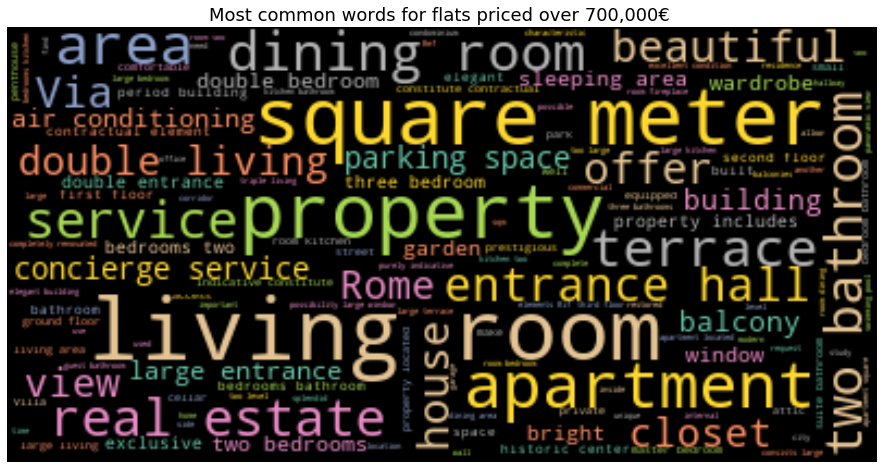

In [17]:
# Most common words for house with price over 700,000€ 
from wordcloud import WordCloud,STOPWORDS

# Create a df3 copy where will be dropped rows with missing descriptions
df3 = df2[df2['desc_no_sw'] != 'Description available']
df3

sns.set_context('talk')
plt.figure(figsize=(16,8))
wc = WordCloud(max_words=1000, max_font_size=40, background_color='black', stopwords=STOPWORDS, colormap='Set2')
wc.generate(' '.join(df3[df3['price'] > 700000] ['desc_no_sw']))
plt.title('Most common words for flats priced over 700,000€ ')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

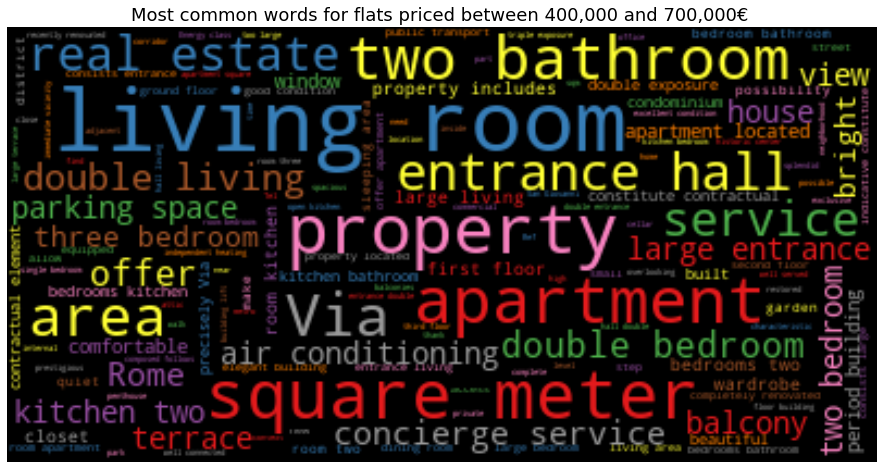

In [18]:
# Most common words for house with price range between 400,000€ and 700,000€ 
#Set the context and the figure
sns.set_context('talk')
plt.figure(figsize=(16,8))

# Instantiate the Wordcloud
wc = WordCloud(max_words=1000, max_font_size=40, background_color='black', stopwords=STOPWORDS, colormap='Set1')
wc.generate(' '.join(df3[df3['price'].between(400000, 700000, inclusive=False)] ['desc_no_sw']))

# Set the title and show the wordcloud using Matplotlib
plt.title('Most common words for flats priced between 400,000 and 700,000€ ')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

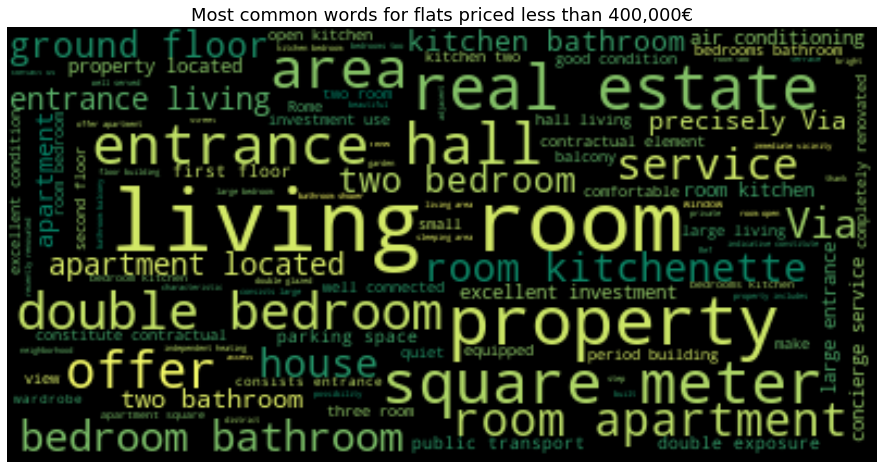

In [19]:
# Most common words for house with price less than 400,000€ 
#Set the context and the figure
sns.set_context('talk')
plt.figure(figsize=(16,8))

# Instantiate the Wordcloud
wc = WordCloud(max_words=1000, max_font_size=40, background_color='black', stopwords=STOPWORDS, colormap='summer')
wc.generate(' '.join(df3[df3['price'] <= 400000] ['desc_no_sw']))

# Set the title and show the wordcloud using Matplotlib
plt.title('Most common words for flats priced less than 400,000€')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

The following considerations can be made from the above word analysis:

* **Over 700,000€ flats**: view concierge service and parking space two bathroom terrace and beautiful

* **Flats priced between 400K and 700k**: two bathroom three bedroom concierge service balcony

* **Flats valued less than 400,000€**:

### Outliers: 
are those data point that differs significantly from other observations.

Below an helper function that I'll use to determine whether there are outliers in this dataset.

In [34]:
def calc_outliers(df_num):
    """
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics and numerical feature that you set on input
    """
    # 1. Calculating the mean and standard deviation of the array
    data_std, data_mean = np.std(df_num), np.mean(df_num)
    
    data_med = np.median(df_num)
    
    # 2. Set the cut line to both higher and lower values
    cut = data_std*3
    
    # 3. Calculating the upper and lower cut values
    upper, lower = data_mean + cut, data_mean - cut
    
    # 4. Creating an array of lower, higher and total outliers values
    outliers_lower = [x for x in df_num if x < lower]
    outliers_upper = [x for x in df_num if x > upper]
    outliers_total = outliers_lower + outliers_upper
    
     # 5. Array without outliers values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    # 6. Printing total number of upper outliers, lower outliers, aggregate of outliers, non outliers and percentage on total of outliers
    
    print(f'The mean value is: {round(data_mean,2)}')
    print(f'The lower cut value is: {round(lower,2)}')
    print(f'The upper cut value is: {round(upper,2)}')
    print('Identified lower outliers: %d' % len(outliers_lower))
    
    
    print(f'Indentified upper outliers: {len(outliers_upper)}')
    
    print(f'Identified total number of lower and upper outliers: {len(outliers_total)}')
    
    print(f'The median for this feature is: {data_med}')
    
    print(f'Non-outliers observation: {len(outliers_removed)}')
    
    print(f'Percentage of outliers on total: {round(len(outliers_total)/len(outliers_removed)*100, 2)}%')

In [35]:
# use the function to detemine whther or not there are outliers values within the price
calc_outliers(df2.price)

The mean value is: 557459.69
The lower cut value is: -1974782.5
The upper cut value is: 3089701.89
Identified lower outliers: 0
Indentified upper outliers: 181
Identified total number of lower and upper outliers: 181
The median for this feature is: 378000.0
Non-outliers observation: 16045
Percentage of outliers on total: 1.13%


(0, 5000000)

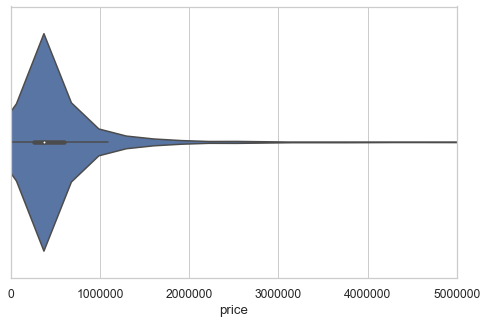

In [31]:
# Use a Violin plot to visualize the outliers
sns.violinplot(df2.price)
plt.xlim(0, 5000000)

## Numerical features overview

First I decided to quickly check distributions of `bathrooms`, `rooms` and `surface` features, plotting their histograms.

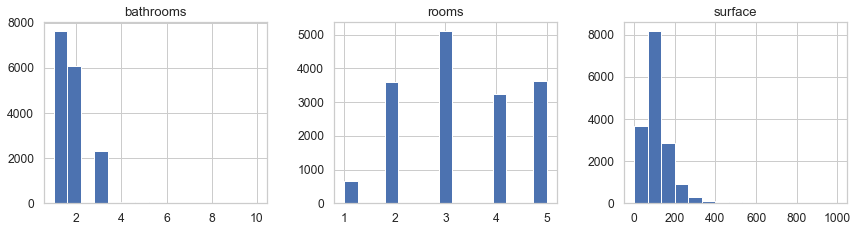

In [124]:
numerical = [ 'rooms', 'bathrooms', 'surface']
df2[numerical].hist(bins=15, figsize=(30, 12), layout=(3, 6));

### Correlation matrix

is used to show correlation coefficients between variables. Each cell in the table shows the correlation between two variables. 

In this case this is helpful to draw the following considerations:

* Highest relationship coefficient for the price is the surface, which means that the parameters are directly related.

* Other important correlations are those between price and both bathrooms and rooms, which obviously have significant relevance to determine the final price.

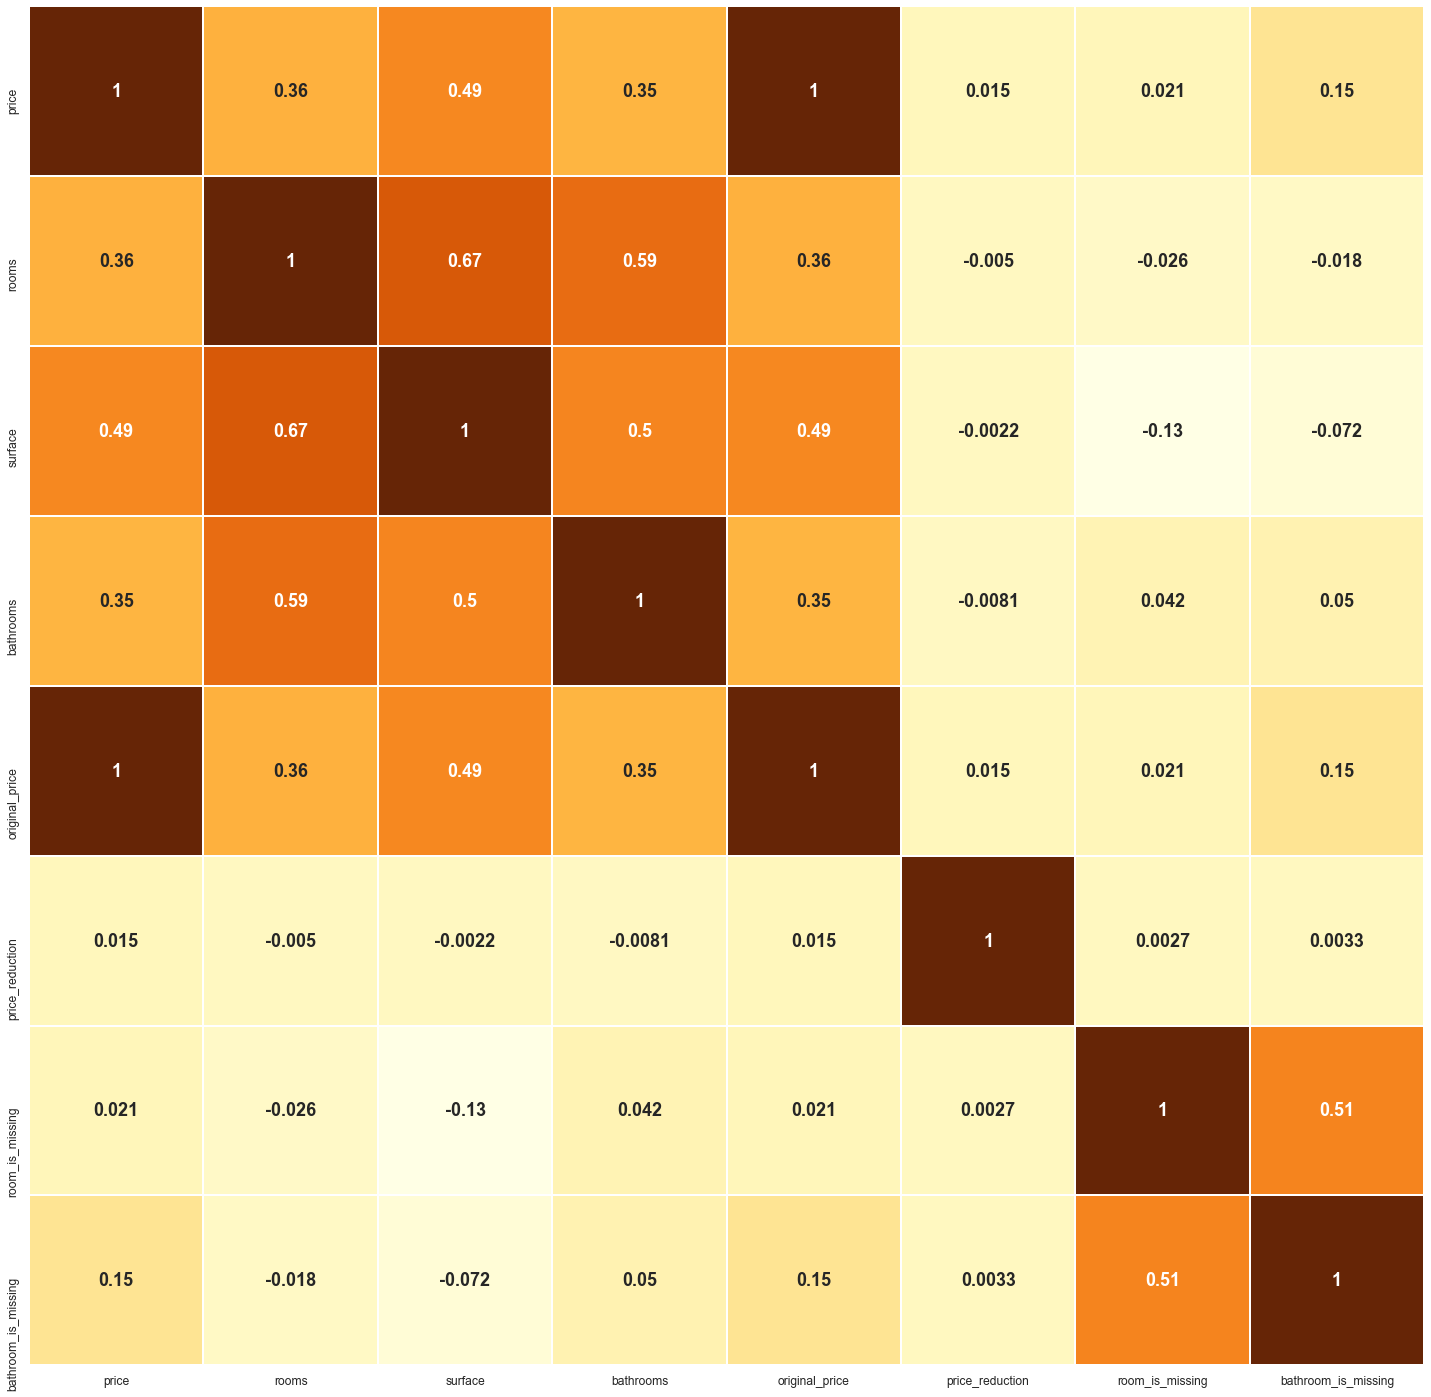

In [25]:
plt.subplots(figsize=(25,25))
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap='YlOrBr',cbar=False ,linewidths=1, annot_kws={"fontsize":18, 'fontweight':'bold'})
plt.yticks(rotation=90);

### Price distribution

From below plots, we can see how the maiority of flats scraped range from 300k to 600k, with the median located at 378k

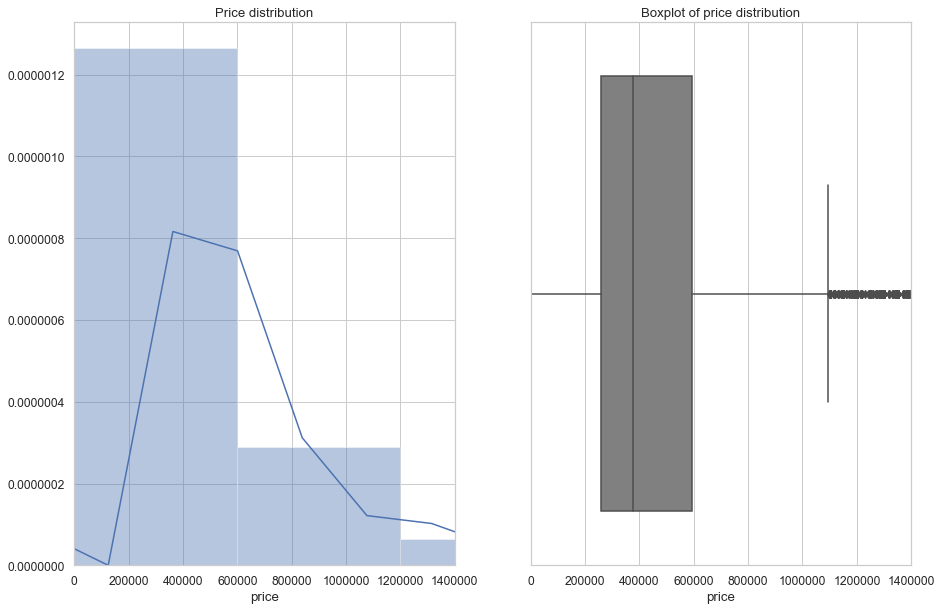

In [36]:
# Check price distribution through normal distribution and boxplot chart
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax1, ax2 = ax.flatten()
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(a=df2.price, ax=ax1)
sns.boxplot(x=df2.price, ax=ax2, color='grey')
ax1.set_title('Price distribution')
ax2.set_title('Boxplot of price distribution')
ax1.set_xlim(0, 1400000)
ax2.set_xlim(0, 1400000);

In [36]:
df2

,property,url,price,rooms,surface,bathrooms,floor,description,original_price,price_reduction,area,room_is_missing,bathroom_is_missing,desc_no_sw
0,Penthouse via di Santa Maria della Speranza 11...,https://www.immobiliare.it/en/annunci/85455828/,235000.0,2.0,52.0,1,4,Description not available,235000.0,0.0,Nuovo Salario,0,0,Description available
1,"3-room flat via Eugenio Torelli Viollier, Piet...",https://www.immobiliare.it/en/annunci/85452104/,238000.0,3.0,87.0,1,2,"Tiburtina, apartment for sale adjacent to Larg...",238000.0,0.0,Pietralata,0,0,"Tiburtina , apartment adjacent Largo Tenente B..."
2,"2-room flat via Satrico, San Giovanni, Roma",https://www.immobiliare.it/en/annunci/85396286/,255000.0,2.0,60.0,1,5,"S. Giovanni, Two-room apartment for sale on th...",255000.0,0.0,San Giovanni,0,0,"S. Giovanni , Two-room apartment 5th floor per..."
3,"2-room flat piazza Giovanni da Triora, Garbate...",https://www.immobiliare.it/en/annunci/85393966/,245000.0,2.0,55.0,1,Mezzanine,Description not available,245000.0,0.0,Garbatella,0,0,Description available
4,"Studio via Morlupo 13, Fleming, Roma",https://www.immobiliare.it/en/annunci/85282655/,109000.0,1.0,23.0,1,Ground,Description not available,109000.0,0.0,Fleming,0,0,Description available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16221,"Single family villa via Guardistallo, Roma",https://www.immobiliare.it/en/annunci/84770380/,1050000.0,5.0,800.0,3,NaN,Rif: guardistallo(villa) - This charming villa...,1050000.0,0.0,NaN,0,0,Rif : guardistallo ( villa ) - This charming v...
16222,"Farmhouse, excellent condition, 1200 sq.m., Roma",https://www.immobiliare.it/en/annunci/83416201/,2500000.0,5.0,1.0,3,NaN,The DPR Immobiliare Replat offers for sale a p...,2500000.0,0.0,NaN,0,0,The DPR Immobiliare Replat offers prestigious ...
16223,"Apartment piazza Barberini, Roma",https://www.immobiliare.it/en/annunci/80419773/,1390000.0,5.0,235.0,3,2,Description not available,1390000.0,0.0,NaN,0,0,Description available
16224,"Apartment zona Prati, Roma",https://www.immobiliare.it/en/annunci/82529190/,1350000.0,5.0,330.0,2,NaN,Description not available,1350000.0,0.0,NaN,0,1,Description available


### Rome's Areas Analysis


#### Area with more/less property on the market

In [ ]:
# Area with most 

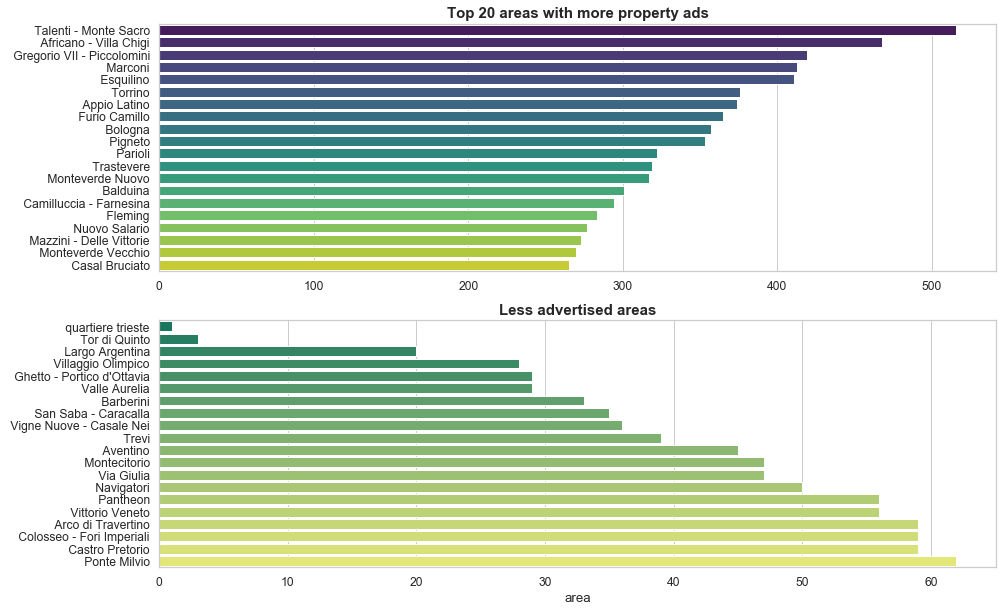

In [17]:
#### Area with most/less ads 

a = df2['area'].value_counts()
top = a.sort_values(ascending = False)[:20]
bottom = a.sort_values(ascending=True)[:20]

# 
fig, ax = plt.subplots(2, 1, figsize=(15,10))
ax1, ax2 = ax.flatten()
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.barplot(x=top, y=top.index, ax=ax1, orient='h', palette='viridis')
sns.barplot(x=bottom, y=bottom.index, ax=ax2, palette='summer')
ax1.set_title('Top 20 areas with more property ads', fontweight="bold", fontsize=15)
ax2.set_title('Less advertised areas', fontweight="bold", fontsize=15)
ax1.set_xlabel('');

#### Compare average and min/max price for top 10 areas with more advertised properties

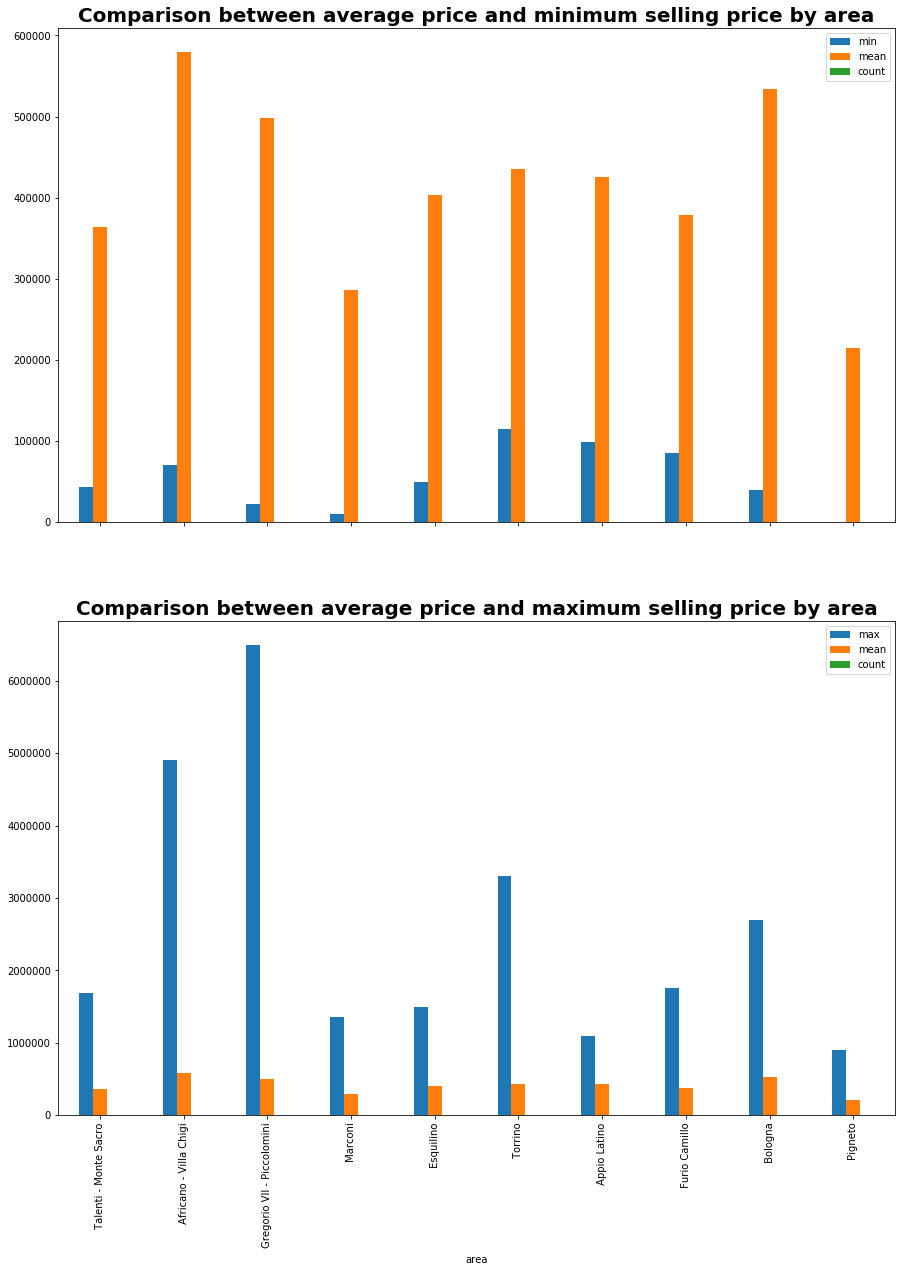

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(15,20), sharex=True )
ax1, ax2 = ax.flatten()

area_group_min = df2.groupby('area')['price'].agg(['min', 'mean', 'count'])
area_group_min.sort_values(by='count', ascending=False)[:10].plot(kind='bar', ax=ax1)
ax1.set_title('Comparison between average price and minimum selling price by area', fontweight="bold", fontsize=20)

area_group_max = df2.groupby('area')['price'].agg(['max', 'mean', 'count'])
area_group_max.sort_values(by='count', ascending=False)[:10].plot(kind='bar', ax=ax2)
ax2.set_title('Comparison between average price and maximum selling price by area', fontweight="bold", fontsize=20);

#### Scatterplot of price by area

From this plot we can see how each area has a different price distribution and which area is more affordable than others.

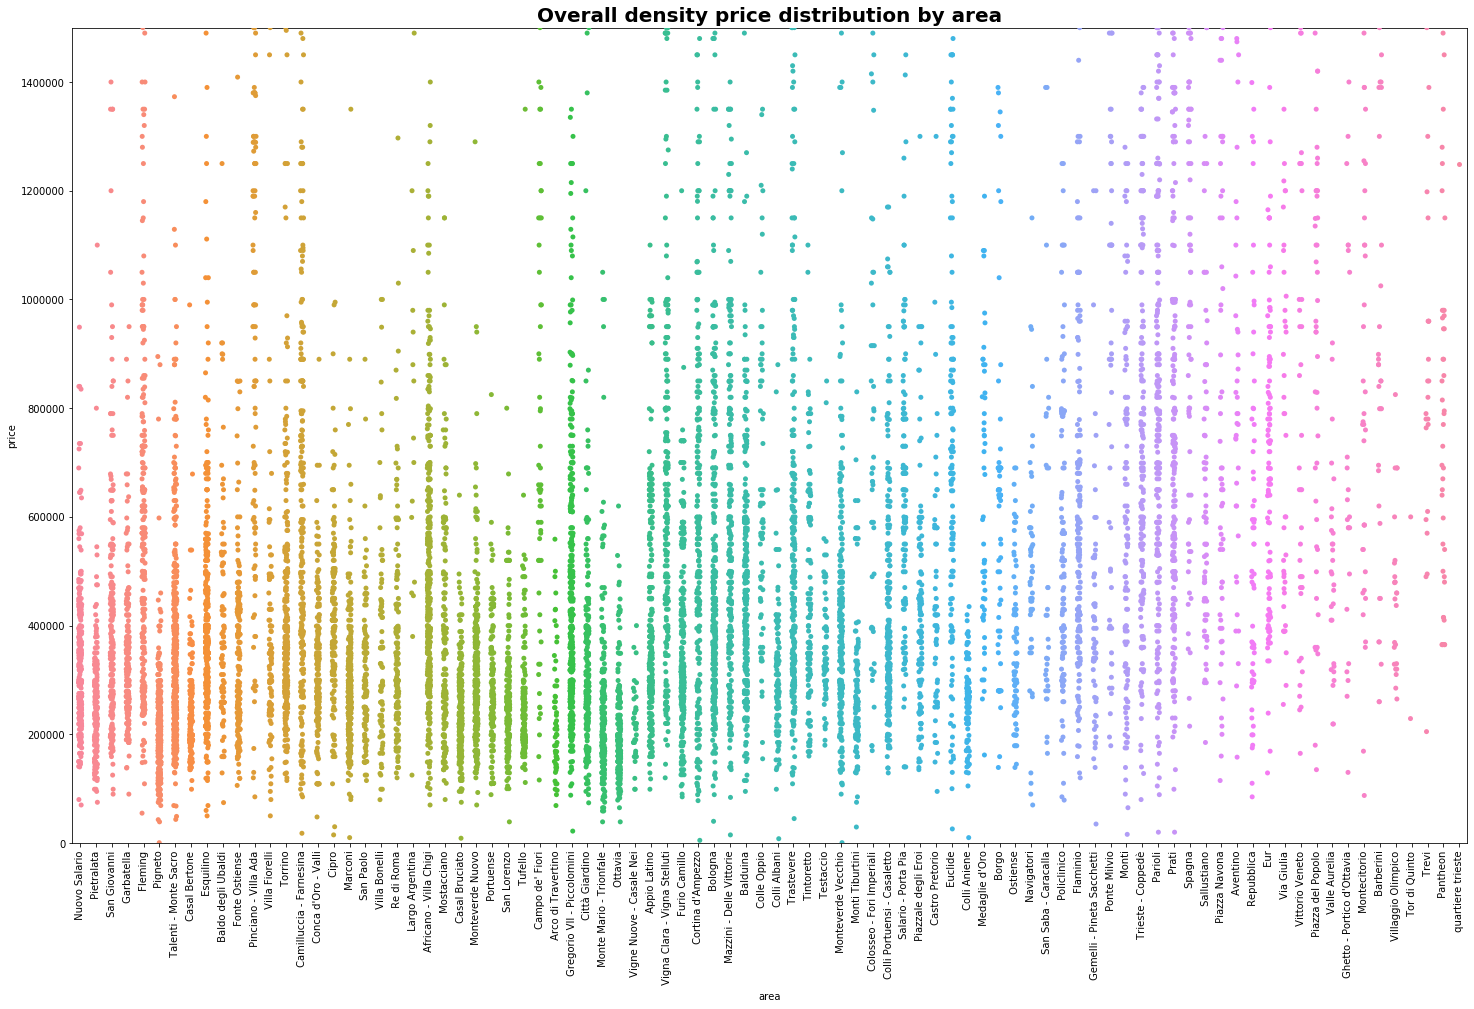

In [14]:
# Plot the scatterplot
plt.figure(figsize=(25,15))
sns.stripplot(x=df2.area, y=df2.price, hue_order=df2.price )
plt.xticks(rotation=90)
plt.ylim(0,1500000)
plt.title('Overall density price distribution by area', fontweight="bold", fontsize=20);

### Price by room

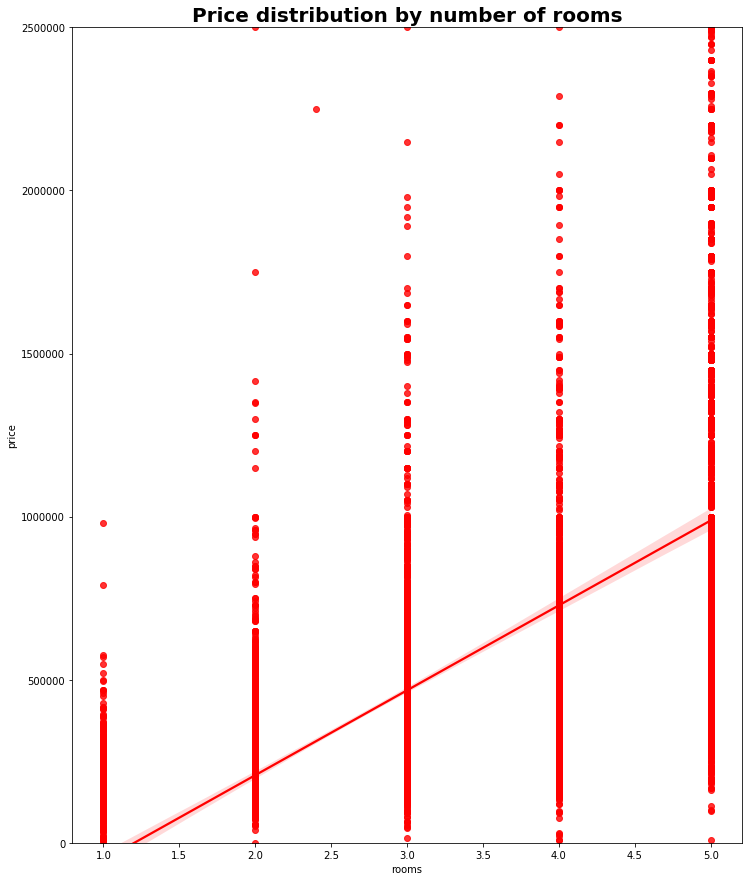

In [13]:
fig, ax = plt.subplots(figsize=(12,15))
ax = sns.regplot(x=df2.rooms, y=df2.price, color='red', )
plt.title('Price distribution by number of rooms', fontweight="bold", fontsize=20)
plt.ylim(0,2500000);

### Price distribution by floor

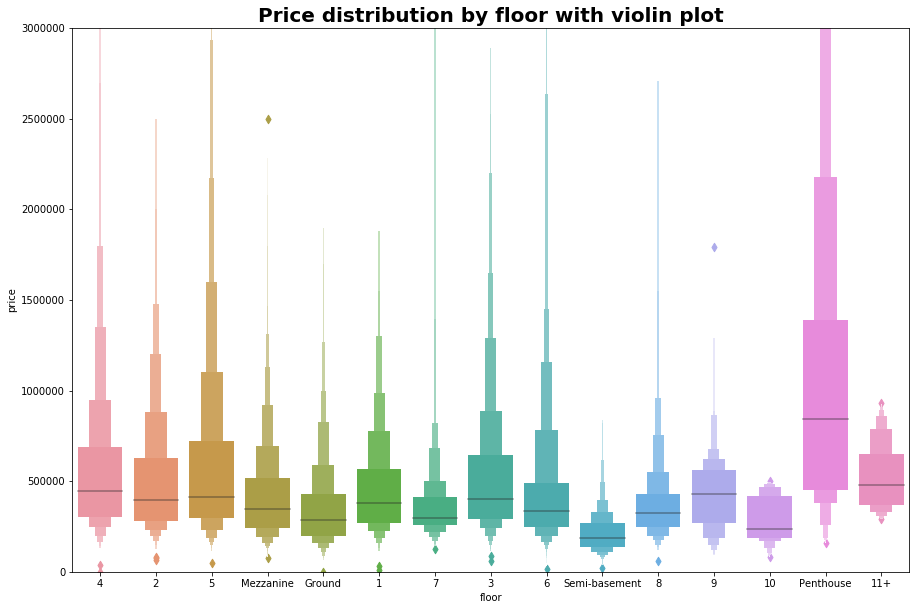

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxenplot(x='floor',y='price', data=df2)
plt.ylim(0,3000000)
plt.title('Price distribution by floor with violin plot', fontweight="bold", fontsize=20);

### Multiplot flat floor by area

Let's check if there is any correlation between `Floor` and city `area`

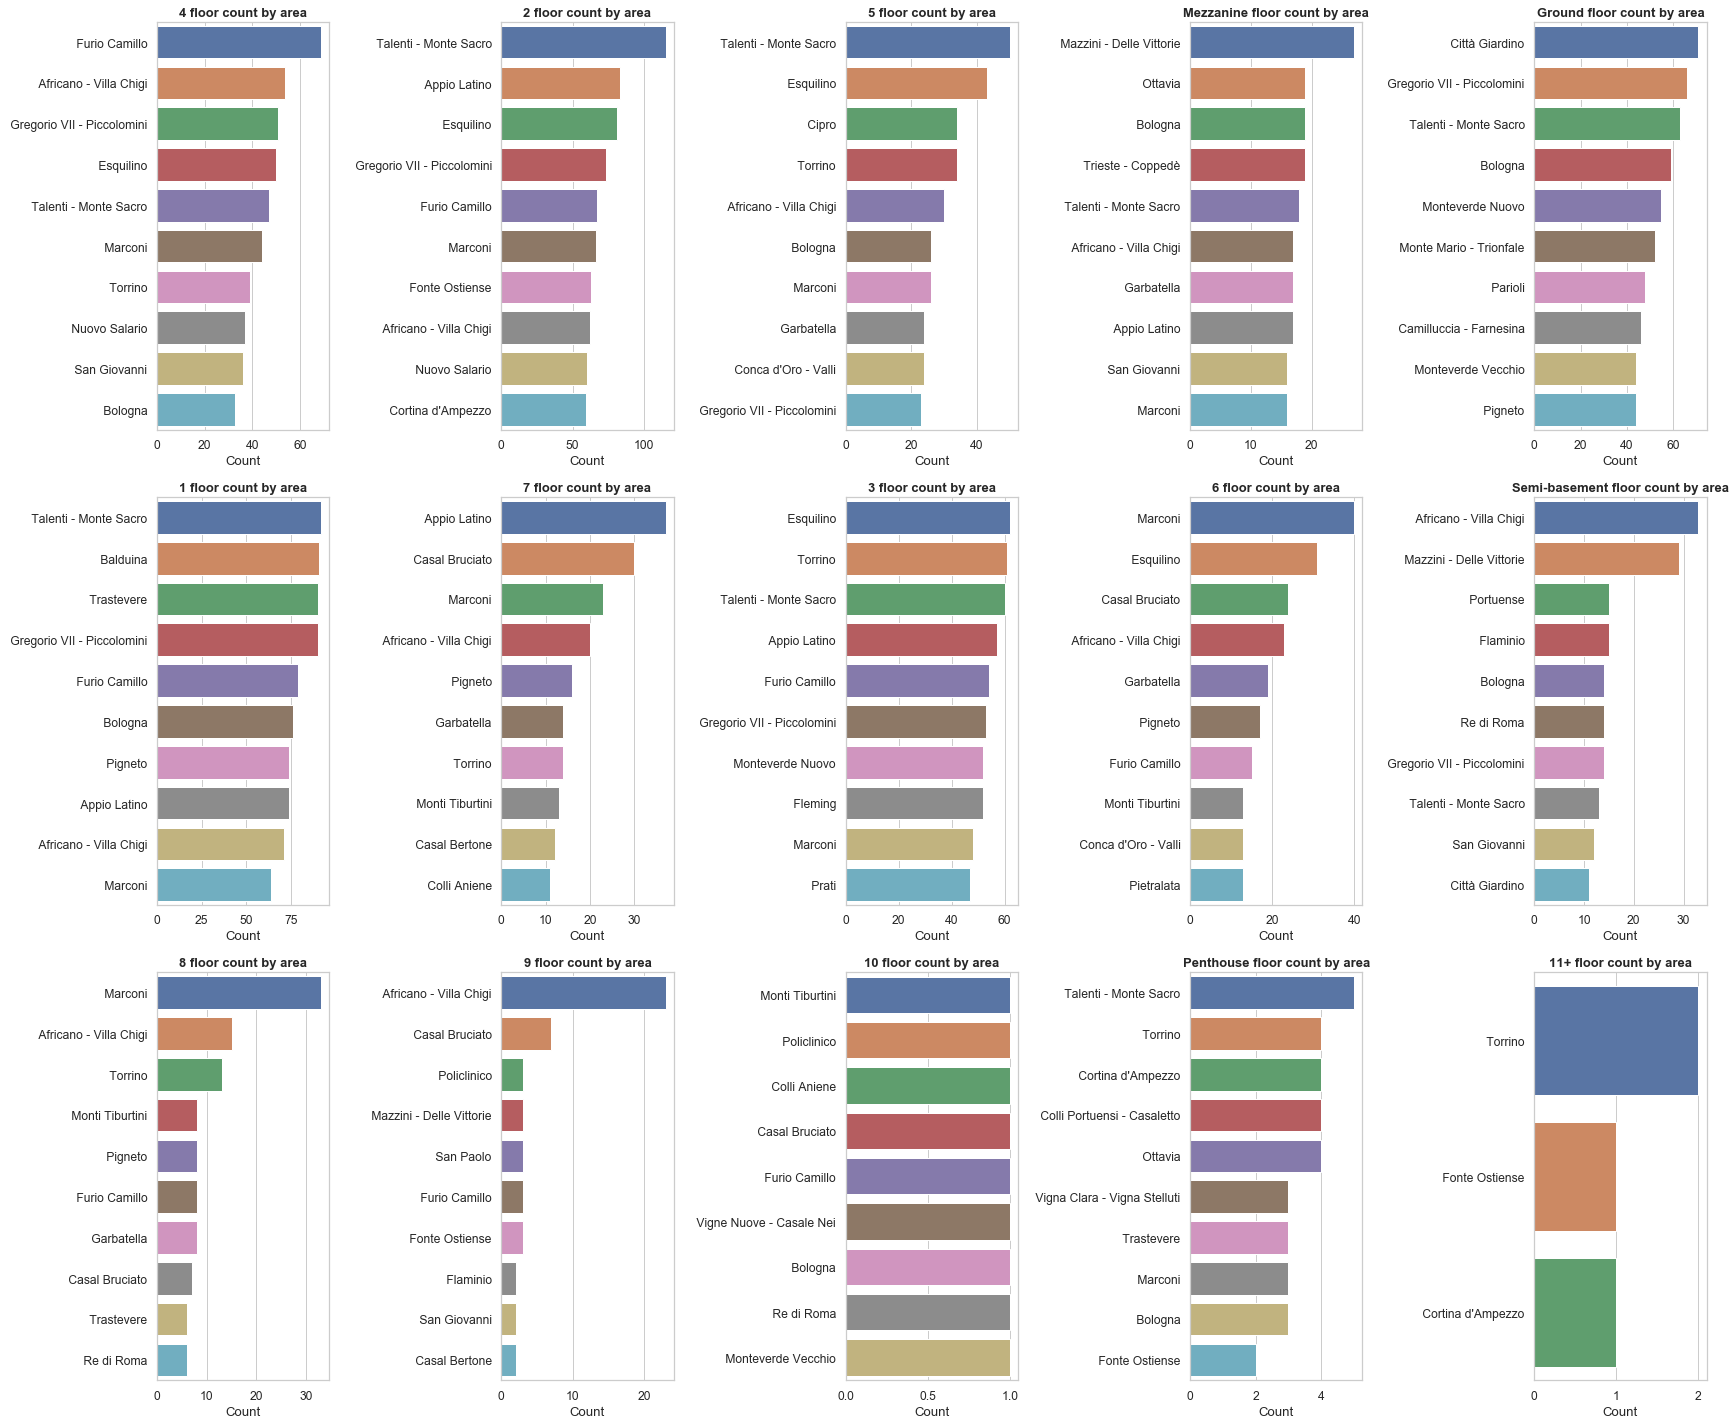

In [56]:
all_floors = ['4', '2', '5', 'Mezzanine', 'Ground', '1', '7', '3', '6','Semi-basement', '8', '9', '10', 'Penthouse', '11+']

n_rows = 3
n_cols = 5

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_rows*8, n_cols*4))



for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+c
                
        if i < len(all_floors):
            a = df2[df2['floor'] == all_floors[i]] ['area'].value_counts()[:10]
            sns.barplot(orient='h', x=a, y=a.index, ax = axs[r][c])
            axs[r][c].set_title(f'{all_floors[i]} floor count by area',fontsize=13, fontweight='bold')
            axs[r][c].set_xlabel('Count')
            
            
plt.tight_layout()    
plt.show()           
    
    
    #plt.title(label = floor)
    #plt.xlabel('Count')
    #plt.ylabel('Area')
    
#     for r in range(0,nr_rows):
#     for c in range(0,nr_cols):  
#         i = r*nr_cols+c
#         if i < len(li_cat_feats):
#             sns.boxplot(x=li_cat_feats[i], y=target, data=df_train, )



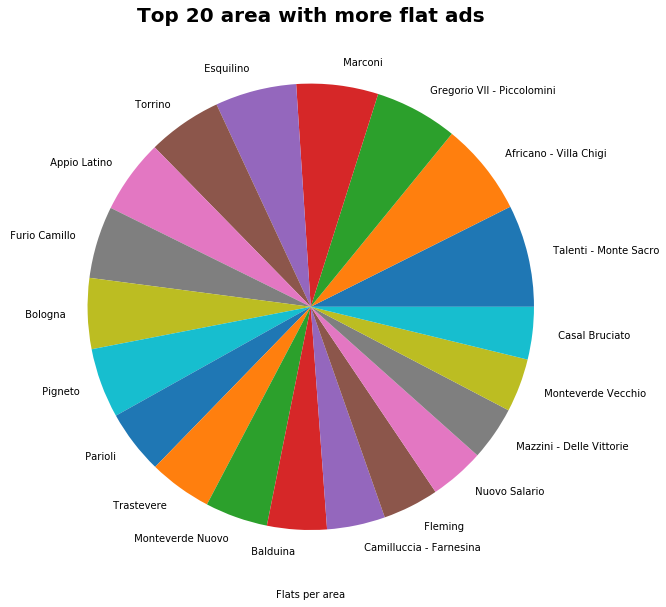

In [10]:
# Plot a pie chart to represent neighboroughs 
plt.figure(figsize=(10,20))
a = df2['area'].value_counts().sort_values(ascending=False)[:20]
labels= a.index
a.plot(kind='pie', labels=labels)
plt.title('Top 20 area with more flat ads',fontweight="bold", fontsize=20)
plt.xlabel('Ads count')
plt.xlabel('Flats per area')
plt.ylabel('');

### Multiplot 

Create a multiplot grid that shows relationship between numerical features. This gives us an overall overview on relationship degree between those features.

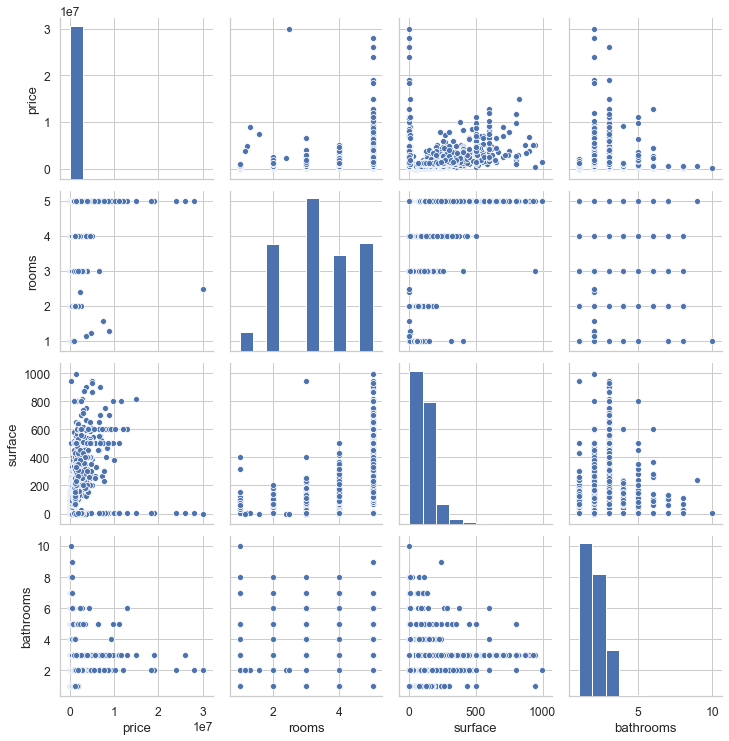

In [18]:
# Define the interest subset and plot it with seaborn pairplot
subset = df2.iloc[:,[2,3,4,5,6]]
sns.pairplot(subset);